<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/Zipf_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Zipf
<hr>

# **Dicionário de Têrmos**

Crie um dicionário de têrmos (palavras) para a biografia da atriz **Kate Beckinsale**. 

1. A primeira célula obtém o texto da biografia da atriz na variável `texto`. 
2. Na segunda célula **adapte o código** para criar o dicionário de têrmos com a seguinte estrutura:

```
  mydict = { 'word1': qty, 'word2': qty, 'word3': qty, ...}
```
3. A terceira célula apresenta um gráfico de distribuição dos têrmos do seu dicionário

<img src="https://meusite.mackenzie.br/rogerio/kate_beckinsale.png" width=300, align="right">


In [1]:
# Obtém o texto na lista 'texto'
# Não altere este código

import urllib.request  # the lib that handles the url stuff

texto = []

# Moby-Dick, Hermann Melville
# https://www.gutenberg.org/files/15/15-0.txt
# Ulysses, James Joyce
# https://www.gutenberg.org/files/4300/4300-0.txt

# for line in urllib.request.urlopen('https://www.gutenberg.org/files/4300/4300-0.txt'): 
for line in urllib.request.urlopen('https://www.gutenberg.org/files/15/15-0.txt'): 
#   print(line.decode('utf-8')) #utf-8 or iso8859-1 or whatever the page encoding scheme is
    texto.append(line.decode('utf-8'))

# f = open('/kate_beckinsale.txt','r')    
# for line in f:
#    texto.append(line)

for i in range(len(texto)):
    texto[i] = texto[i].lower() # para unicidade
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','') # elimina ' e "
    
# print(texto)


In [2]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(mydict)    

{'\ufeffthe': 1, 'project': 85, 'gutenberg': 25, 'ebook': 12, 'of': 6694, 'moby-dick': 5, 'by': 1205, 'herman': 3, 'melville': 3, 'this': 1362, 'is': 1705, 'for': 1612, 'the': 14442, 'use': 45, 'anyone': 5, 'anywhere': 15, 'in': 4172, 'united': 24, 'states': 24, 'and': 6404, 'most': 284, 'other': 405, 'parts': 42, 'world': 137, 'at': 1317, 'no': 523, 'cost': 4, 'with': 1761, 'almost': 195, 'restrictions': 2, 'whatsoever': 7, 'you': 903, 'may': 247, 'copy': 18, 'it': 2210, 'give': 78, 'away': 159, 'or': 787, 're-use': 2, 'under': 119, 'terms': 33, 'license': 19, 'included': 11, 'online': 4, 'wwwgutenbergorg': 5, 'if': 487, 'are': 612, 'not': 1135, 'located': 7, 'will': 388, 'have': 767, 'to': 4644, 'check': 5, 'laws': 16, 'country': 23, 'where': 199, 'before': 290, 'using': 17, 'title:': 1, 'author:': 1, 'release': 1, 'date:': 1, '1991': 1, '[ebook': 1, '#15]': 1, '[most': 1, 'recently': 6, 'updated:': 1, 'november': 2, '27': 1, '2020]': 1, 'language:': 2, 'english': 47, 'character': 15

In [3]:
import pandas as pd
df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)

In [4]:
df = df.sort_values('count',ascending=False).reset_index(drop=True)
df.head()



,word,count
0,the,14442
1,of,6694
2,and,6404
3,a,4661
4,to,4644


In [12]:
import numpy as np
df['count'].replace(-np.Inf,0)

0        14442
1         6694
2         6404
3         4661
4         4644
         ...  
24747        1
24748        1
24749        1
24750        1
24751        1
Name: count, Length: 24752, dtype: int64

In [13]:
import numpy as np
df['log_count'] = np.log(df['count'])
df['log_rank'] = np.log(df.index)
df['log_rank'].replace(-np.Inf,0,inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


,word,count,log_count,log_rank
0,the,14442,9.577896,0.000000
1,of,6694,8.808967,0.000000
2,and,6404,8.764678,0.693147
3,a,4661,8.446985,1.098612
4,to,4644,8.443331,1.386294


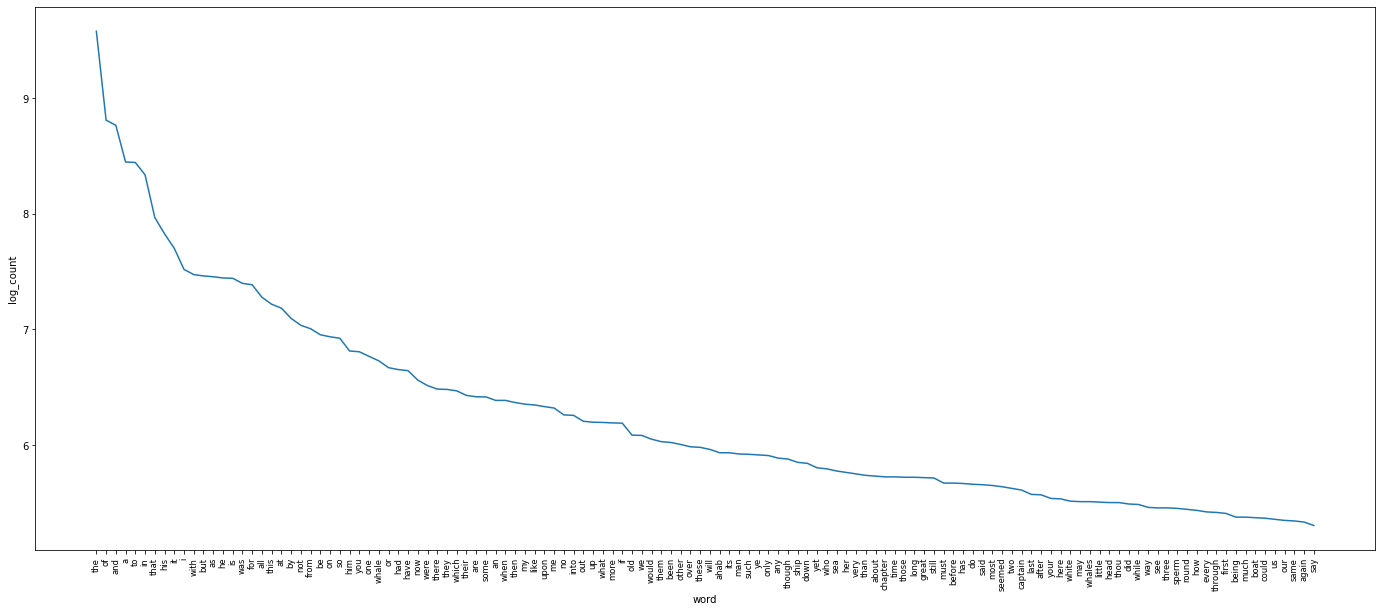

In [14]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# plt.bar(height=df['log_count'])

plt.figure(figsize=(24,10))
sns.lineplot(x=df[df['count'] > 200].word,y=df[df['count'] > 200]['log_count'])
plt.xticks(rotation=90,fontsize='small') 

plt.show()

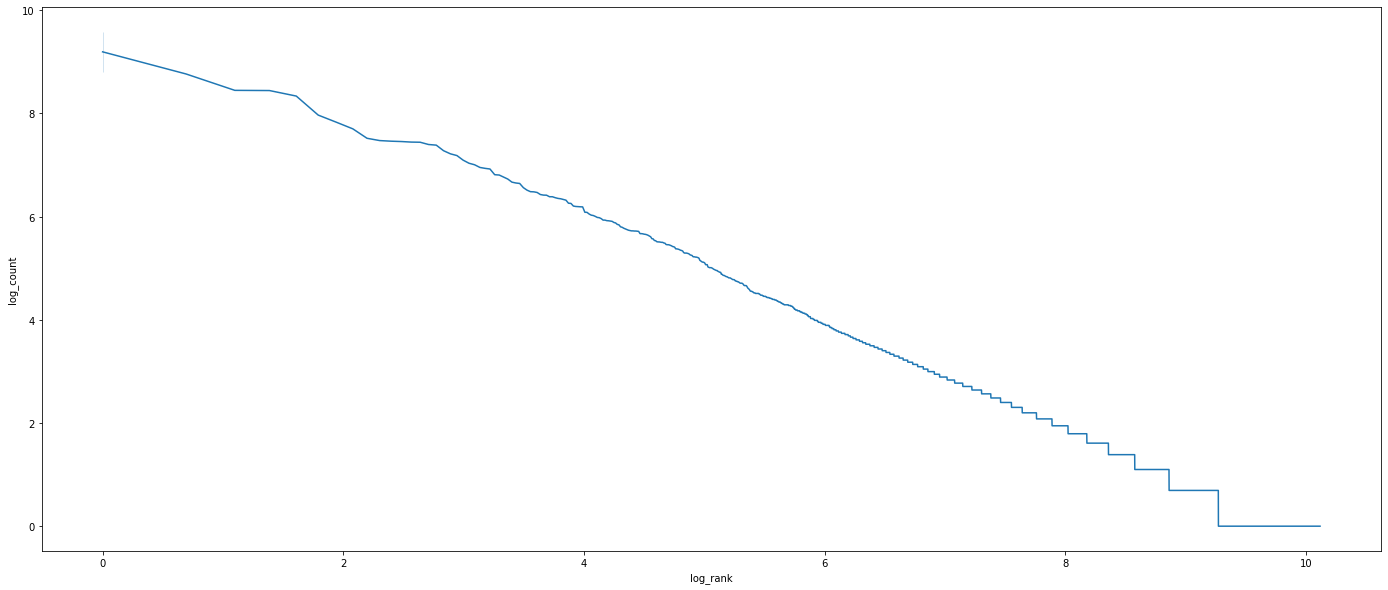

In [15]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
# plt.bar(height=df['log_count'])

plt.figure(figsize=(24,10))
sns.lineplot(x=df['log_rank'],y=df['log_count'])

plt.show()

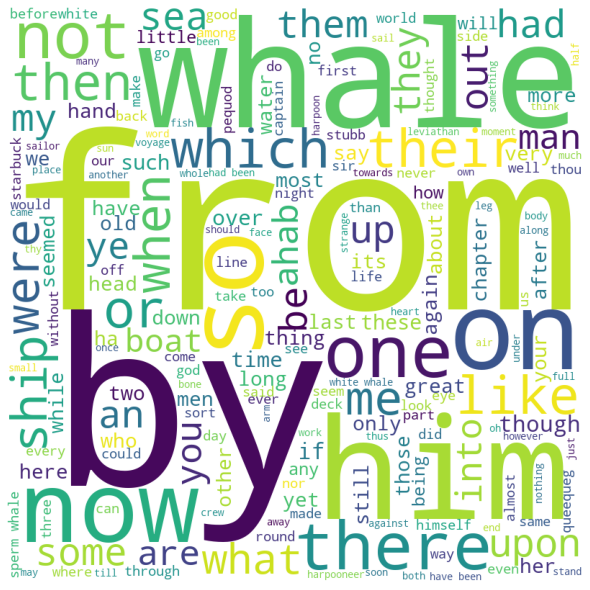

In [16]:
from wordcloud import WordCloud, STOPWORDS

# Python program to generate WordCloud

# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# stopwords = set(STOPWORDS)
# stopwords.update({'said','one'})
stopwords = set(df.word.head( 20 ))

texto_string = ''

for line in texto: 
  texto_string = texto_string + ' ' + line.lower()  

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(texto_string)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


## Luhn e Zipf Law e Ciência de Dados

A frequência de termos (quantidade que cada palavra aparece em um texto) tem grande importância em uma série de problemas envolvendo busca, classificação e sumarização automática de documentos.  

As palavras que um texto contêm e a frequencia delas pode muito bem dar uma pista do conteúdo do texto  

> Hans Peter Luhn (1957): **The weight of a term that occurs in a document is simply proportional to the term frequency**.

Entretanto parecem haver termos muito frequentes, como artigos, preposições etc. que parecem contribuir muito pouco para explicar o conteúdo de um texto.

> George Kingsley Zipf: **Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number n has a frequency proportional to 1/n.**

Isso ocorre em todo o texto de produção humana e, importante, em *qualquer língua*. Esse princípio é empregado desde para decifrar códigos e texto em linguas antigas, como em modernos sistemas de mineração de texto (*search engines*, bibliotecas digitais, classificação automática de conteúdo etc.).

Veja alguns textos famosos em diferentes línguas:  

In [17]:
from IPython.display import IFrame
IFrame('https://demonstrations.wolfram.com/ZipfsLawAppliedToWordAndLetterFrequencies/', width='1000', height=600)